## TEXT DATA ENCODING AND BASIC NEURAL NETWORK BUILDING

In [1]:
#imports

# general imports
from IPython.display import display, Markdown #just to display markdown
import numpy as np  #for vector operation
import string   # provides strings variations for character embedding
import os

# keras imports
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3" # avoids tensorflow warning message
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Flatten, Dense

# visualiaztion imports
%matplotlib inline
# utility functions
import os
import sys
%matplotlib inline
os.path.dirname(os.path.abspath("__file__"))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from utility.utils import utils
utility_obj = utils()

Using TensorFlow backend.


## Understanding text encoding

### Sample texts

In [2]:
#creating sample text
samples = ["The cat sat on the mat", " The dog ate my homework"] 
samples

['The cat sat on the mat', ' The dog ate my homework']

### Word level one hot encoding

In [3]:
#initializing word-encoding dictionary
token_index = {} 

def word_one_hot_embeddings(text_samples,max_sentence_length=8):
    """
        # Creating sentence vectors by represent each word as a vector
        # word as a vector: vector of length of vocabulary, with "1" for that specified word and zero elsewhere
    """

    # Encoding words in the corpus
    print("\nStarting to create token_index for every distinct vocabulary")
    for sample in text_samples:
        for word in sample.split():
            if word not in token_index.keys():
                token_index[word] = len(token_index) + 1
    print("token_index created.\n")

    # Word level one hot encoding
    print("\nStarting to create sentence vector using token_index")
    results = np.zeros(shape=(len(text_samples),len(token_index)+1))
    for i , sample in enumerate(text_samples):
        for j , word in enumerate(sample.split()):
            index_ = token_index[word]
            results[i,index_] = 1
    print("sentences vectorised.\n")
    return (results)

word_level_vectorised_sample = word_one_hot_embeddings(text_samples=samples,max_sentence_length=8)
shape = (word_level_vectorised_sample.shape)



display(Markdown("#### created word index's for sentence encoding"))
print (token_index)

display(Markdown("#### result"))
print("Output shape {}".format(word_level_vectorised_sample.shape))
print("# sample:{},  specified max length:{},  # vocabulary:{}\n".format(len(samples),shape[0],shape[1]))
print(word_level_vectorised_sample)

print(
"""
Note:  In the final result, index of each element in the vectors denotes the eoncoding of the words.
       "0"/"1" denote presence of a vocabulary
"""
)


Starting to create token_index for every distinct vocabulary
token_index created.


Starting to create sentence vector using token_index
sentences vectorised.



#### created word index's for sentence encoding

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework': 10}


#### result

Output shape (2, 11)
# sample:2,  specified max length:2,  # vocabulary:11

[[0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.]]

Note:  In the final result, index of each element in the vectors denotes the eoncoding of the words.
       "0"/"1" denote presence of a vocabulary



### WORD LEVEL ONE HOT ENCODING - keras 

In [4]:
# One-hot encoding using keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=len (token_index))
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples) # sentence encoding
one_hot_results = tokenizer.texts_to_matrix(samples,mode='binary') # creating one hot results
shape = (one_hot_results.shape)

word_index = tokenizer.word_index
one_hot_results

display(Markdown("#### sentence encoding results"))
print (sequences)
display(Markdown("#### created word index's for sentence encoding"))
print (word_index)



display(Markdown("#### result"))
print("Output shape {}".format(one_hot_results.shape))
print("# sample:{},  specified max length:{},  # vocabulary:{}\n".format(len(samples),shape[0],shape[1]))
print (one_hot_results)

print(
"""
Note:  In the final result, index of each element in the vectors denotes the eoncoding of the words.
       "0"/"1" denote presence of a vocabulary
"""
)

#### sentence encoding results

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]


#### created word index's for sentence encoding

{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


#### result

Output shape (2, 10)
# sample:2,  specified max length:2,  # vocabulary:10

[[0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 1. 1. 1.]]

Note:  In the final result, index of each element in the vectors denotes the eoncoding of the words.
       "0"/"1" denote presence of a vocabulary



### CHARACTER LEVEL ONE HOT ENCODING 

In [5]:
def character_one_hot_embeddings(characters,max_sentence_length_in_characters=30):
    """
        # Creating sentence vectors by using character level encoding
    """
    character_index =  dict(zip(characters,(range(1,len(characters)+1))))
    results = np.zeros(shape=(len(samples),max_sentence_length_in_characters,len(characters)+1))

    for i , sample in enumerate(samples):
        #print (sample)
        for j , character in enumerate(sample):
            #print (i,j,character_index.get(character),character)
            results[i,j,character_index.get(character)] = 1
    return (results,character_index)
            
characters = string.printable
char_level_vectorised_sample, character_index = character_one_hot_embeddings(characters)
shape = (char_level_vectorised_sample.shape)

display(Markdown("#### characters used for encoding"))
print ("{} distinct character vocab present".format(len(characters)))
print ("Character level indexing")
print(character_index,"\n")


display(Markdown("#### result"))
print("Output shape {}".format(char_level_vectorised_sample.shape))
print("# sample:{},  specified max length:{},  # vocabulary:{}\n".format(shape[0],shape[1],shape[2]))
print(char_level_vectorised_sample)

#### characters used for encoding

100 distinct character vocab present
Character level indexing
{'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10, 'a': 11, 'b': 12, 'c': 13, 'd': 14, 'e': 15, 'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20, 'k': 21, 'l': 22, 'm': 23, 'n': 24, 'o': 25, 'p': 26, 'q': 27, 'r': 28, 's': 29, 't': 30, 'u': 31, 'v': 32, 'w': 33, 'x': 34, 'y': 35, 'z': 36, 'A': 37, 'B': 38, 'C': 39, 'D': 40, 'E': 41, 'F': 42, 'G': 43, 'H': 44, 'I': 45, 'J': 46, 'K': 47, 'L': 48, 'M': 49, 'N': 50, 'O': 51, 'P': 52, 'Q': 53, 'R': 54, 'S': 55, 'T': 56, 'U': 57, 'V': 58, 'W': 59, 'X': 60, 'Y': 61, 'Z': 62, '!': 63, '"': 64, '#': 65, '$': 66, '%': 67, '&': 68, "'": 69, '(': 70, ')': 71, '*': 72, '+': 73, ',': 74, '-': 75, '.': 76, '/': 77, ':': 78, ';': 79, '<': 80, '=': 81, '>': 82, '?': 83, '@': 84, '[': 85, '\\': 86, ']': 87, '^': 88, '_': 89, '`': 90, '{': 91, '|': 92, '}': 93, '~': 94, ' ': 95, '\t': 96, '\n': 97, '\r': 98, '\x0b': 99, '\x0c': 100} 



#### result

Output shape (2, 30, 101)
# sample:2,  specified max length:30,  # vocabulary:101

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


### Word level one hot encoding using hashing

In [6]:
dimensionality = len(token_index)
max_length = 10

results = np.zeros((len(samples),dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index= abs(hash(word)% dimensionality)
        results[i, index] =1
        
display(Markdown("#### result"))
results

#### result

array([[0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 1., 1., 0.]])

## UNDERSTANDING WORD EMBEDDING WITH EMBEDDING LAYER

### imdb dataset preparation

In [9]:
# loading the IMDB dataset

# download the dataset from "ai.stanford.edu/~amaas/data/sentiment/" 
# extract the dataset 

imdb_dir = "/home/sj-ai-lsb/Documents/datasets/aclImdb" # actual path to imdb dataset folder
train_dir = os.path.join(imdb_dir,"train")


# collecting text from each file 
# collecting corresponding text labels
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
         if fname[-4:] == '.txt':
                f = open(os.path.join(dir_name, fname))
                texts.append(f.read())
                f.close()
                if label_type == 'neg':
                    labels.append(0)
                else:
                    labels.append(1)

print ("Raw data\n")

print ("Raw text {}\n".format(texts[:2]))
print ("text labels {}\n".format(labels[:2]))


display(Markdown("#### creating word embedding on imdb dataset"))

# pre-processing initializations
n_vocab = 10000 # max number of distinct vocabulary (top 10,000)
max_sentence_length = 100  # Cuts a review after 100 words
training_samples = 200 # number of training examples
validation_samples = 10000 # number of validation examples

# pre-processing dataset

# starting to create word emdedding

# building tokenizer (keras object that holds index_to_word dictionary, n_vocab, etc parameters)
tokenizer = Tokenizer(num_words=n_vocab)
tokenizer.fit_on_texts(texts) # feeding the text data to tokenizer

# creating word vectors using keras tokenizer & cutting each sentence after 100 words
sequences = tokenizer.texts_to_sequences(texts) 
sequences_padded = pad_sequences(sequences,maxlen=max_sentence_length) # default paddind is "pre" in keras
word_index = tokenizer.word_index # word_to_index mappind dictionary

print ("Found {} unique token.\n".format(len(word_index)) )

# training and testind data split
indices = np.arange(sequences_padded.shape[0])
np.random.shuffle(indices)
sequences_padded = sequences_padded[indices]
labels = np.asarray(labels)[indices]
x_train = sequences_padded[:training_samples]
y_train = labels[:training_samples]
x_val = sequences_padded[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

print ("After data preprocessing")
print(" # Training samples {}, # Testing samples {}\n".format(x_train.shape[0],x_val.shape[0]))
print("Word encoded imdb review data")
print(x_train[:2])

print("\nImdb review data lables")
print(y_train[:2])
print(
"""
Note:  
0 : "Negative review"
1 : "Positive review"
"""
)
print ("Data loading complete..")

Raw data

Raw text ['Trying to conceive of something as insipid as THE SENTINEL would be pretty difficult. The problems are many. The result is terrible and loaded with plot holes.<br /><br />Michael Douglas stars as Pete Garrison, a Secret Service agent who "took one" for Reagan during the attempt on his life. Years later we find Pete assigned to the Whitehouse Family, mainly as a guard for the First Lady (Kim Basinger, L.A. CONFIDENTIAL). Troubles arise as we see Pete\'s close involvement with the First Lady, and a sudden threat against the President himself (David Rasche, UNITED 93). When Pete fails a polygraph test, he\'s singled out as a disgruntled agent by investigator David Breckinridge (Kiefer Sutherland, 24 TV series).<br /><br />As the presidential assassination plot unfolds, Pete finds himself on the run from his own people. His only confidant is the First Lady, and she\'s reluctant to tell anyone about their affections for one another (which is why Pete failed the polygrap

#### creating word embedding on imdb dataset

Found 88582 unique token.

After data preprocessing
 # Training samples 200, # Testing samples 10000

Word encoded imdb review data
[[5246   13    3  760 1912   10  241  147   32    2   12   40 1533   12
     1  277 1892  207 1892   12 4569  373  175    6   54   50  144   71
    44    9   68  280   92  135  119   10  560  100  108  150    4  109
     3 1443  171 8967  419   10   63   13 1892   10   12  705   16   29
    58  480    7    7   44 4569   68    5  329   65 3411   33   59 1965
    12   65  556 1287   37 1516 7182    2  108   82 9383   23 2655 1791
     5   87   33  235   27  767    5  847   12   54  118    6    1  678
  9175 1043]
 [  37   36 5036  372  347 2183 1556   39   57    1  551   34    1  678
    74   37 8063   60   40  957  260  688    5    1  189   12   47    6
    35  114    5   37   41   11   19   72   23   24 1187    5  479   44
   237 2275   39   21   10  101   10 1497    8 1367   12   23  420    5
    27  619    2  559  612 8076   12   23  976    5   27 1977  

### Building a sequential model using embedding layer

In [14]:
# pre-training initializations
max_sentence_length = max_sentence_length  # max sentence length taken from imdb dataset preparation stage

#embedding layer initializations
n_vocab_embedding_layer = n_vocab
size_of_word_vector = 8

## Embedding layer is trainable layer. It is best understood as a dictionary 
## that maps integer indices (which stands for specific words) to a dense vectors

# Creating a 1 layer neural network
model = Sequential()
model.add(Embedding(n_vocab_embedding_layer,size_of_word_vector,input_length=max_sentence_length)) 
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["acc"])
model.summary()

# Starting model training
history = model.fit(x_train,y_train,
                   epochs = 10,
                    batch_size = 128,
                    validation_data=(x_val,y_val)
                   )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 8)            80000     
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 801       
Total params: 80,801
Trainable params: 80,801
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6940 - acc: 0.5000 - val_loss: 0.6933 - val_acc: 0.4930
Epoch 2/10
200/200 [==============================] - 0s 580us/step - loss: 0.6750 - acc: 0.8050 - val_loss: 0.6932 - val_acc: 0.4957
Epoch 3/10
200/200 [==============================] - 0s 606us/step - loss: 0.6618 - acc

### result

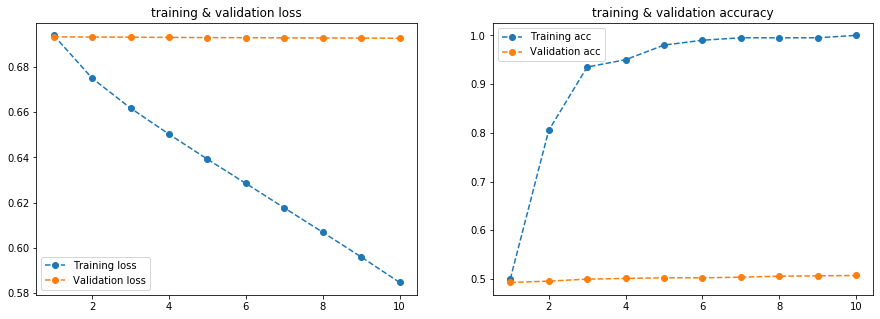

In [15]:
# ploting model training results
utility_obj.plot_training_history(history.history)

## USING GLOVE PRE-TRAINED EMBEDDING FOR EMBEDDING MATRIX

Head to http://nlp.stanford.edu/projects/glove/ and download the pre-computed embeddings from 2014 English
Wikipedia. It’s a 822MB zip file named , containing 100-dimensional glove.6B.zip
embedding vectors for 400,000 words (or non-word tokens). Un-zip it.

In [16]:
#loading data from glove embedding to dict
embeddings_index = {}
f = open("/home/sj-ai-lsb/Documents/datasets/glove.6B/glove.6B.100d.txt")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors in pretrained glove embedding.' % len(embeddings_index))

# preparing glove word-embedding matrix
max_sentence_length = 100  # Cuts a review after 100 words
embedding_dim = 100   # word - vector size as taken from glove embedding
word_index = word_index # word_index taken from imdb dataset preparation stage
n_vocab_embedding_layer = n_vocab # max vacabulory size taken from imdb dataset preparation stage
embedding_matrix = np.zeros((n_vocab_embedding_layer, embedding_dim)) # embedding matrix initialization

for word, i in word_index.items(): 
    embedding_vector = embeddings_index.get(word)
    if i < n_vocab_embedding_layer:
        if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector #Words not found in embedding index will be all-zeros.

display(Markdown("### result"))
print("shape of created word-embedding layer : {}\n".format(embedding_matrix.shape))
print("sample representation of encoded words using glove pre-trained embedding")
print(embedding_matrix[2:4])

Found 400000 word vectors in pretrained glove embedding.


### result

shape of created word-embedding layer : (10000, 100)

sample representation of encoded words using glove pre-trained embedding
[[-0.071953    0.23127     0.023731   -0.50638002  0.33923     0.19589999
  -0.32943001  0.18364    -0.18057001  0.28963     0.20448001 -0.54960001
   0.27399001  0.58327001  0.20468    -0.49228001  0.19973999 -0.070237
  -0.88049001  0.29484999  0.14071    -0.1009      0.99449003  0.36973
   0.44554001  0.28997999 -0.1376     -0.56365001 -0.029365   -0.4122
  -0.25268999  0.63181001 -0.44767001  0.24363001 -0.10813     0.25163999
   0.46967     0.37549999 -0.23613    -0.14128999 -0.44536999 -0.65736997
  -0.042421   -0.28636    -0.28810999  0.063766    0.20281    -0.53542
   0.41306999 -0.59722    -0.38613999  0.19389001 -0.17809001  1.66180003
  -0.011819   -2.3736999   0.058427   -0.26980001  1.2823      0.81924999
  -0.22322001  0.72931999 -0.053211    0.43507001  0.85010999 -0.42934999
   0.92663997  0.39050999  1.05850005 -0.24561    -0.18265    -0.532800

### Building a sequential model using glove embeding in embedding layer

In [19]:
# pre-processing initializations
max_sentence_length = max_sentence_length  # max sentence length taken from imdb dataset preparation stage

#embedding layer initializations
n_vocab_embedding_layer = n_vocab # max number vocabulary taken from imdb dataset preparation stage
size_of_word_vector = embedding_dim # taken from  embedding matrix creation stage

# creating a 2 layer neural network
model = Sequential()
model.add(Embedding(n_vocab_embedding_layer, size_of_word_vector, input_length=max_sentence_length))
model.add(Flatten())
model.add(Dense(32, activation='relu')) # 1 hidden layer with relu activation
model.add(Dense(1, activation='sigmoid'))
model.summary()

# freezing the weights of embedding layer so that glove embedding are maintained
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# staring model training
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 0s 1ms/step - loss: 0.7321 - acc: 0.5050 - val_loss: 5.2436 - val_acc: 0.5019
Epoch 2/10
200/200 [==============================] - 0s 190us/step - loss: 4.4296 -

### result

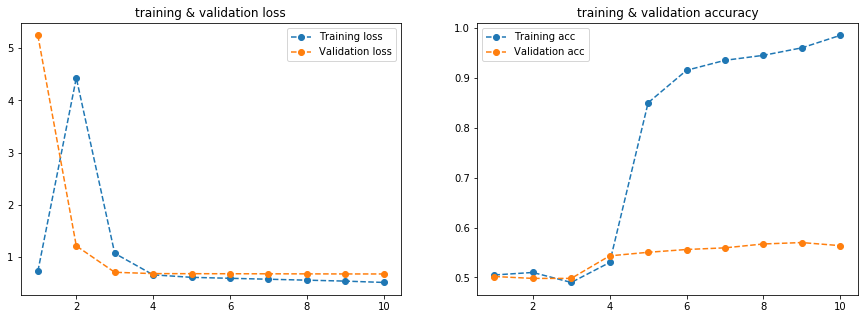

In [20]:
# ploting model training results
utility_obj.plot_training_history(history.history)

## 2 LAYER NEURAL NETWORK, NOW TRAINING EMBEDDING LAYER

In [27]:

# pre-processing initializations
max_sentence_length = max_sentence_length  # max sentence length taken from imdb dataset preparation stage

#embedding layer initializations
n_vocab_embedding_layer = n_vocab # max number vocabulary taken from imdb dataset preparation stage
size_of_word_vector = embedding_dim # taken from  embedding matrix creation stage


# creating a 2 layer neural network
model = Sequential()
model.add(Embedding(n_vocab_embedding_layer, size_of_word_vector, input_length=max_sentence_length))
model.add(Flatten())
model.add(Dense(32, activation='relu')) # 1 hidden layer with relu activation
model.add(Dense(1, activation='sigmoid'))
model.summary()

## NOTE: No layer freezing

# staring model training
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128, verbose=0,
                    validation_data=(x_val, y_val))
print ("\nTraining complete..")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_13 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________

Training complete..


### result

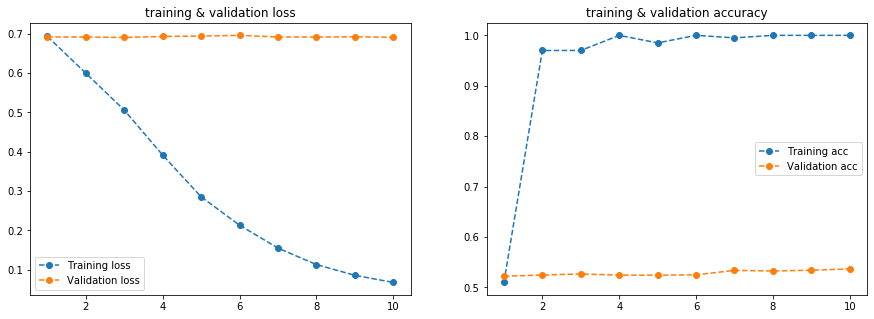

In [28]:
# ploting model training results
utility_obj.plot_training_history(history.history)